In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [116]:
data=pd.read_csv("insurance.csv")

In [117]:
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [118]:
data.shape

(1338, 7)

In [119]:
#value count for categorical data
print(data.sex.value_counts(), '\n',data.children.value_counts(), '\n',data.smoker.value_counts(), '\n',data.region.value_counts())

male      676
female    662
Name: sex, dtype: int64 
 0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64 
 no     1064
yes     274
Name: smoker, dtype: int64 
 southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64


## replacing the categorical variable with numerical variables

In [120]:
data['sex']=data['sex'].map({'male':1,'female':0})
data['smoker']=data['smoker'].map({'yes':1,'no':0})
data['region']=data['region'].map({'southeast':0,'southwest':1,'northwest':2,'northeast':3})


In [121]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,1,16884.92400
1,18,1,33.770,1,0,0,1725.55230
2,28,1,33.000,3,0,0,4449.46200
3,33,1,22.705,0,0,2,21984.47061
4,32,1,28.880,0,0,2,3866.85520


## exploratory data analysis

univariate analysis

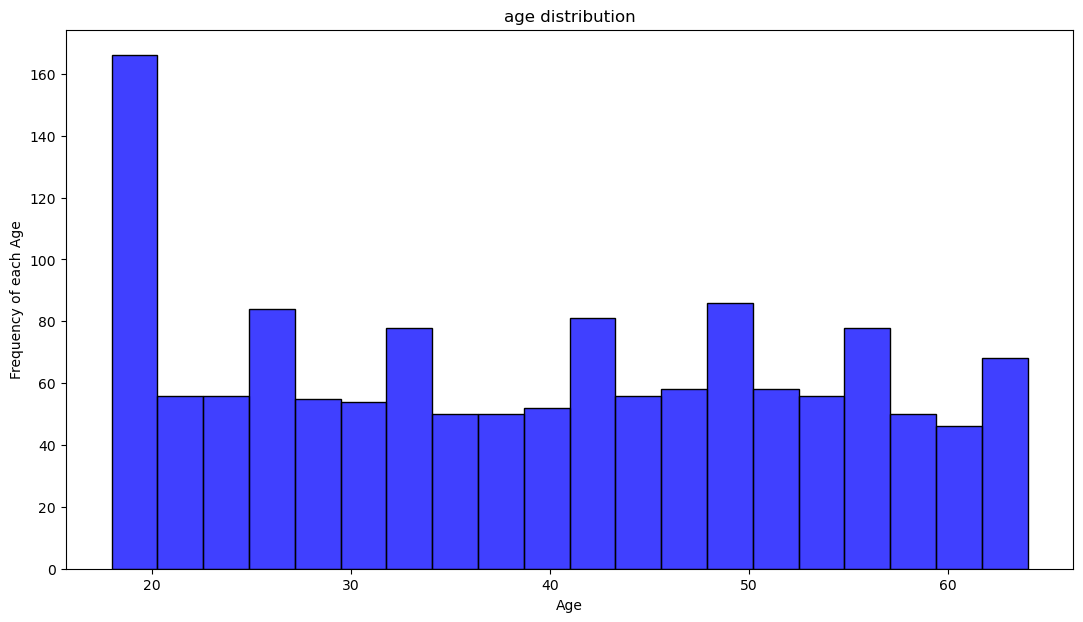

In [122]:
#checking age distribution
plt.figure(figsize=(13,7))
sns.histplot(data.age,bins = 20, kde = False,color = 'blue')
plt.title('age distribution')
plt.xlabel('Age')
plt.ylabel('Frequency of each Age')
plt.show()

 maximum people in dataset have a age below 20

Text(0.5, 1.0, 'gender distribution')

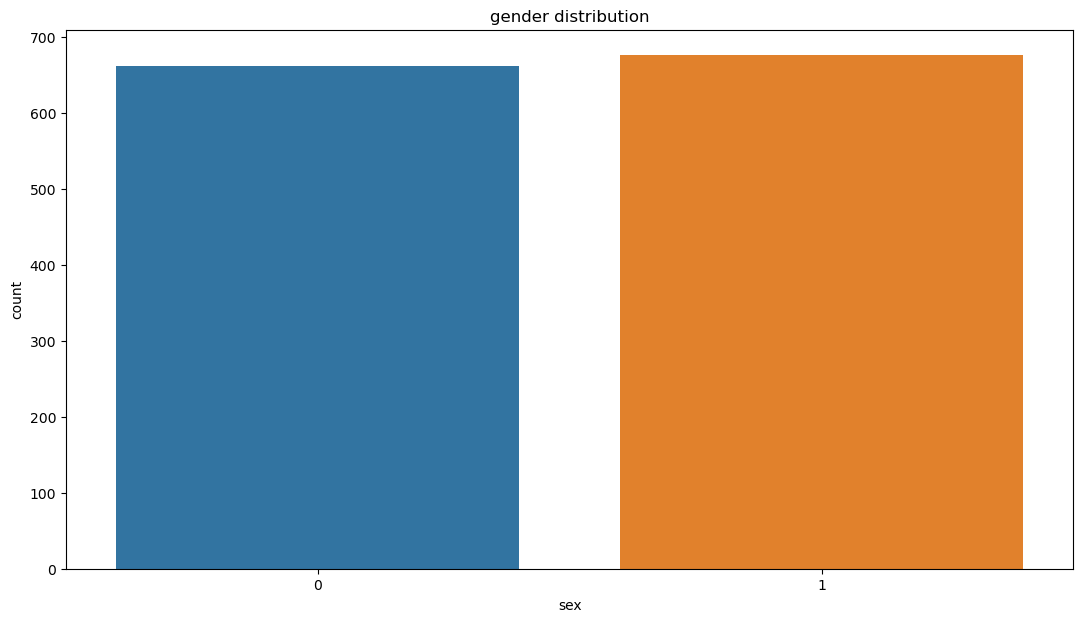

In [123]:
#checking sex distribution
plt.figure(figsize=(13,7))
sns.countplot(x = 'sex' , data = data)
plt.title("gender distribution")

In [124]:
data.describe()

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.663397,1.094918,0.204783,1.455157,13270.422265
std,14.049960,0.500160,6.098187,1.205493,0.403694,1.130197,12110.011237
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900
25%,27.000000,0.000000,26.296250,0.000000,0.000000,0.000000,4740.287150
50%,39.000000,1.000000,30.400000,1.000000,0.000000,1.000000,9382.033000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,2.000000,16639.912515
max,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000,63770.428010


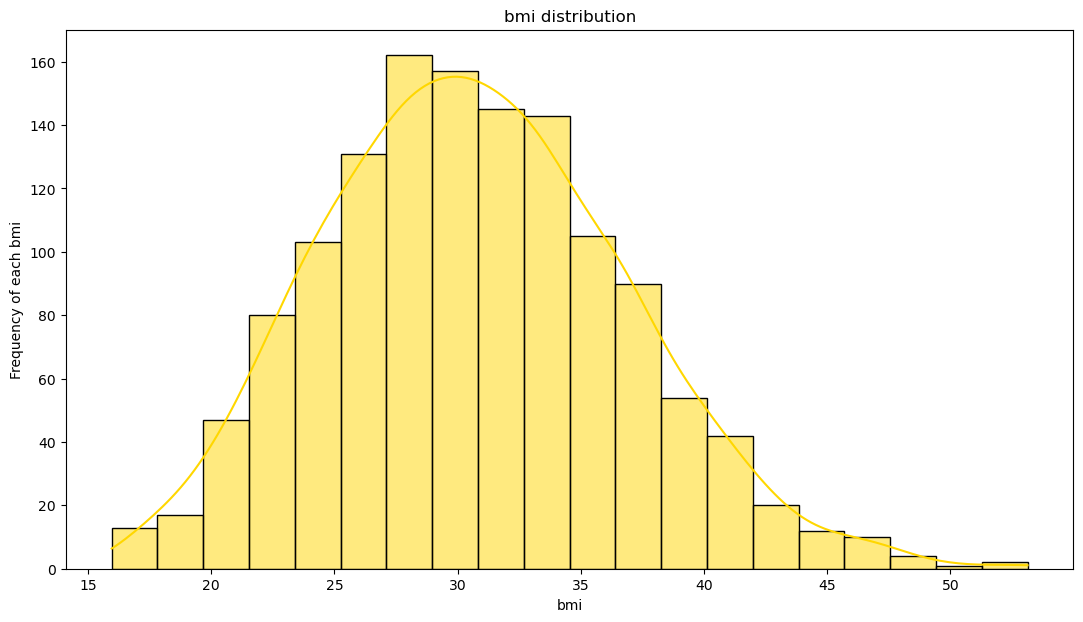

In [125]:
plt.figure(figsize=(13,7))
sns.histplot(data.bmi,bins = 20, kde = True,color = 'gold')
plt.title('bmi distribution')
plt.xlabel('bmi')
plt.ylabel('Frequency of each bmi')
plt.show()

the majority of the people have bmi in between 25 and 40, which is considerd as overweight and could be a major factor in increasing the medical cost

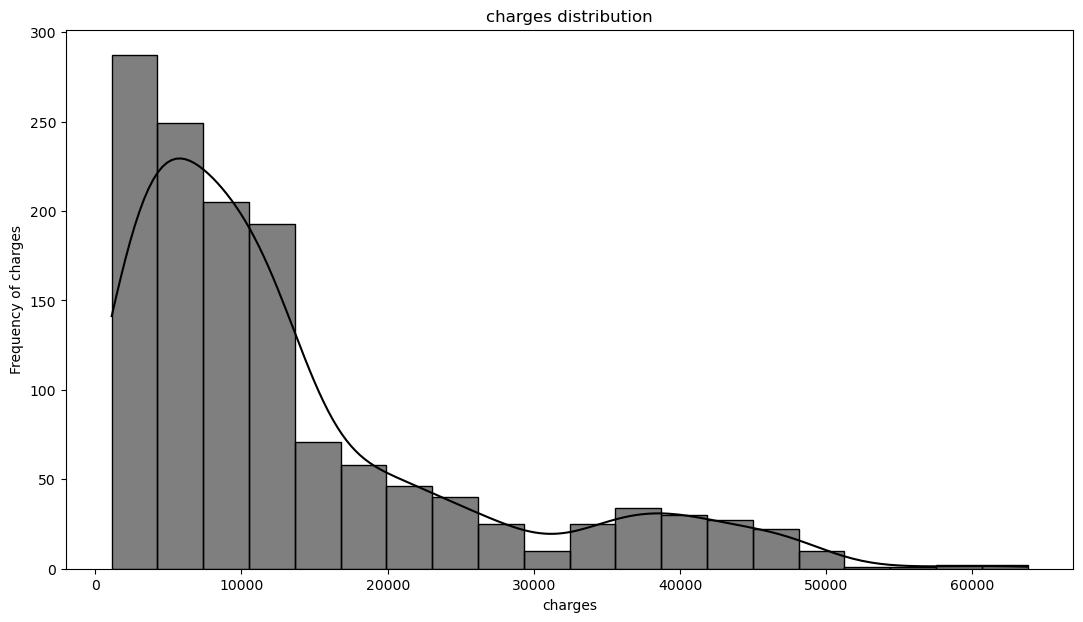

In [126]:
plt.figure(figsize=(13,7))
sns.histplot(data.charges,bins = 20, kde = True,color = 'black')
plt.title('charges distribution')
plt.xlabel('charges')
plt.ylabel('Frequency of charges')
plt.show()

#### most of the medical expenses are below 20000, with negligible number of patients having a medical expense above 50000

<Figure size 1300x700 with 0 Axes>

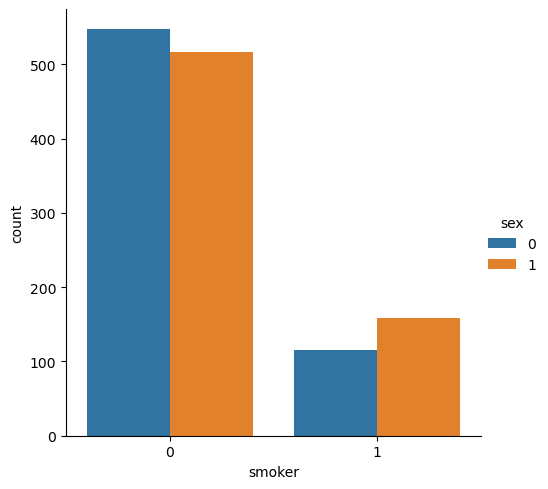

In [127]:
plt.figure(figsize=(13,7))
sns.catplot(x = 'smoker' , kind = 'count' , hue = 'sex' , data = data)
plt.xlabel('smoker')
plt.ylabel('count')
plt.show()

we can observe that male smokers are more in numbers, so i will assume that medical treatment expense for male would be more than female

<Axes: title={'center': 'box plot for charges of women'}, xlabel='charges', ylabel='smoker'>

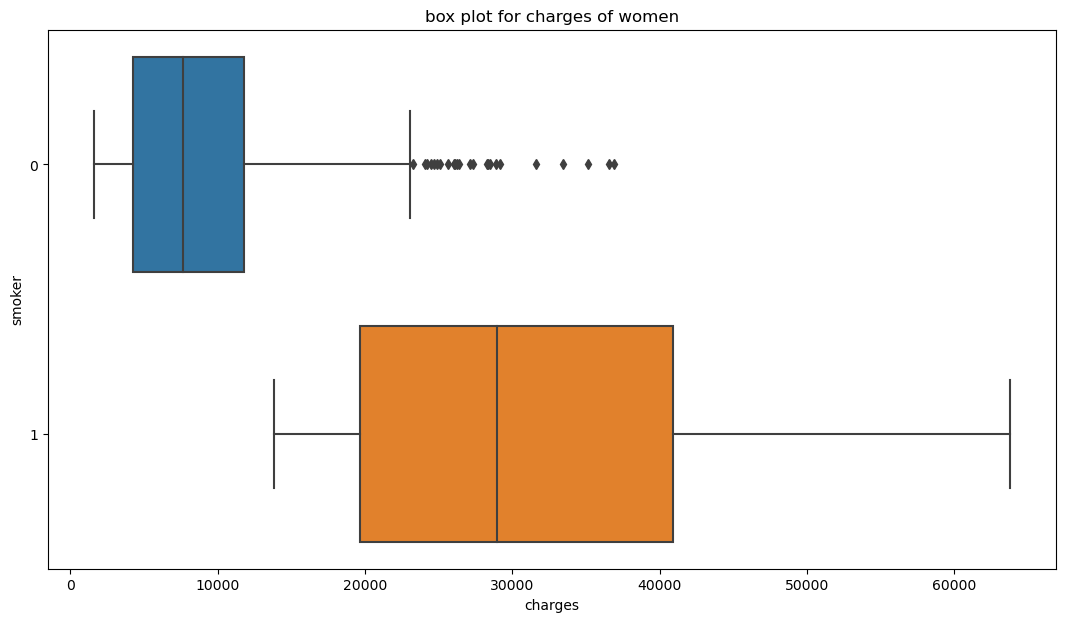

In [128]:
plt.figure(figsize=(13,7))
plt.title('box plot for charges of women')
sns.boxplot(y = 'smoker' , x = 'charges' , data = data[(data.sex==0)],orient = 'h')

<Axes: title={'center': 'box plot for charges of men'}, xlabel='charges', ylabel='smoker'>

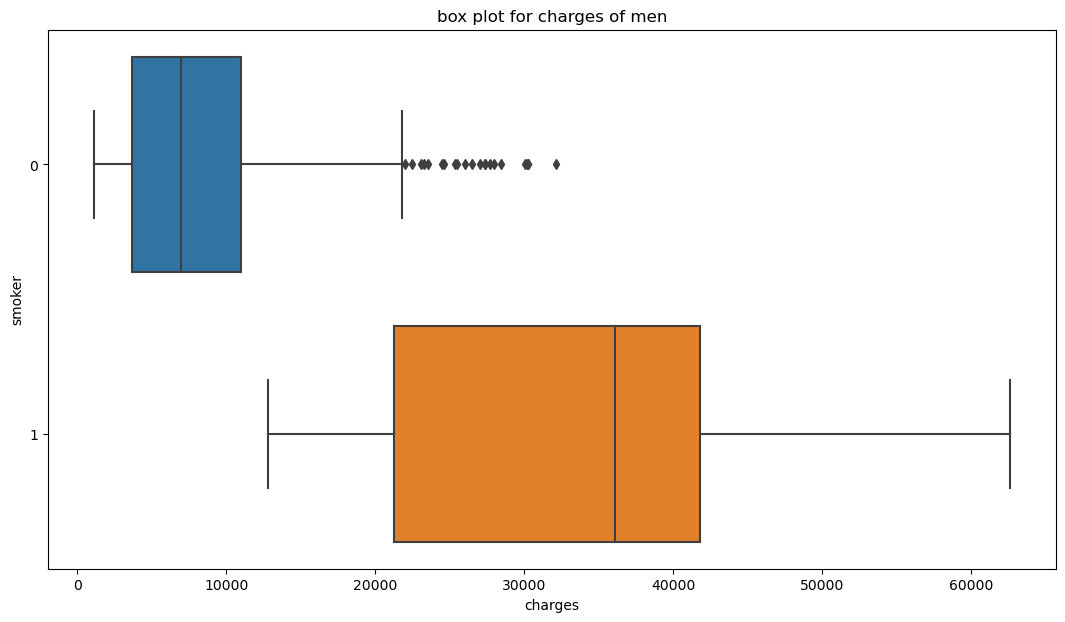

In [129]:
plt.figure(figsize=(13,7))
plt.title('box plot for charges of men')
sns.boxplot(y = 'smoker' , x = 'charges' , data = data[(data.sex==1)],orient = 'h')

the assumption is true , that the medical expenses of males ais greater than that of  females . in addition to that medical expenses of smokers is greater than that of non-smokers.

In [130]:
cor = data.corr()

<Axes: >

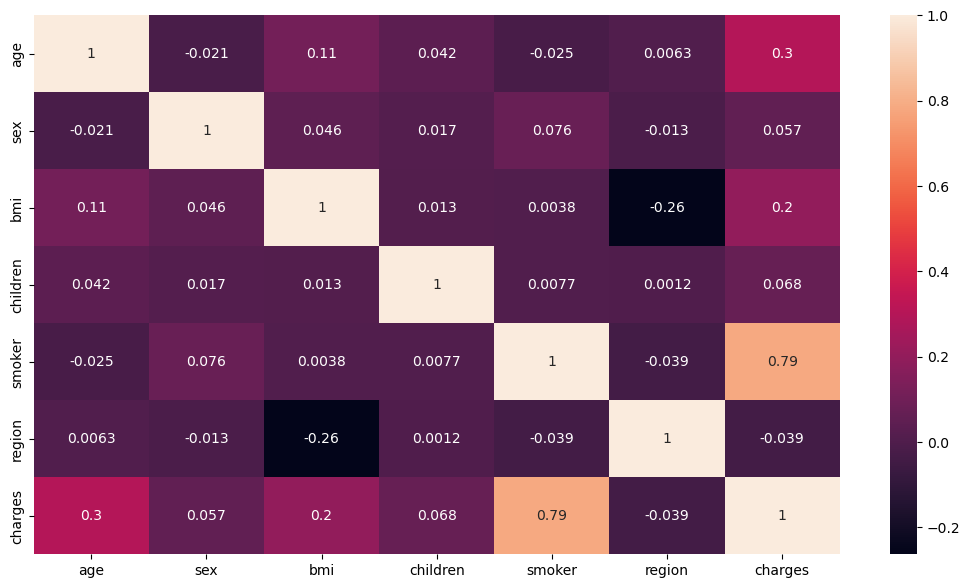

In [131]:
plt.figure(figsize=(13, 7))
sns.heatmap(cor, annot = True )

by pbserving the above plot we can state that smokers has more medical expenses so it has a high impact on insurance charge followed by age and bmi whereas region, gender and children has no impact

C:\anaconda\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 7.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<Figure size 1300x700 with 0 Axes>

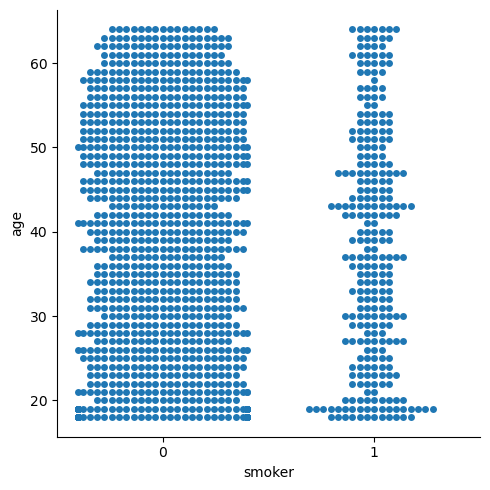

In [132]:
plt.figure(figsize=(13,7))
sns.catplot(x = 'smoker' , y = 'age' , kind = 'swarm' , data = data)

From the above graph, We can tell that there is a significant number of smokers at the age of 19

## multi-varied analysis

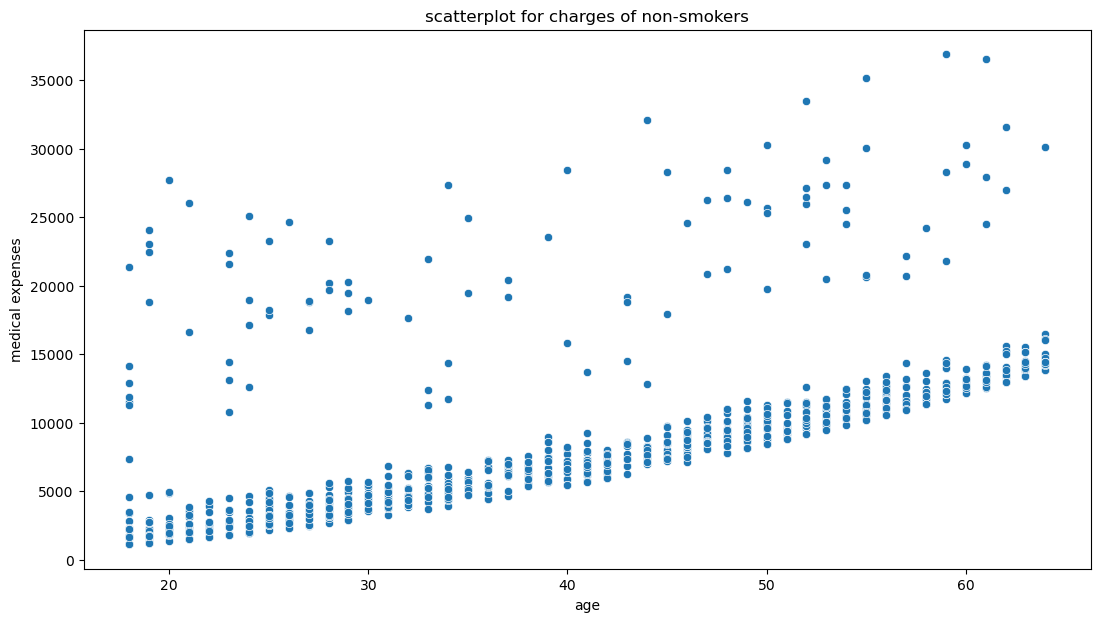

In [133]:
plt.figure(figsize=(13,7))

sns.scatterplot(x= 'age' , y = 'charges' , data = data[(data.smoker == 0)])
plt.title("scatterplot for charges of non-smokers")
plt.xlabel('age')
plt.ylabel('medical expenses')
plt.show()

majority of the points show that medical expenses increases with the age which may due to the fact that older people are more prone to illness . But there are some outlires which shows other illness or expenses which may lead to increase in medical expenses

In [134]:
left-out

NameError: name 'left' is not defined

in this graph there are two segments one with high medical expense which may due to the smoking related illness and other with low medical expense which may due to age related illness

now, in order to get more clear we can combine both the graph

<Figure size 1500x700 with 0 Axes>

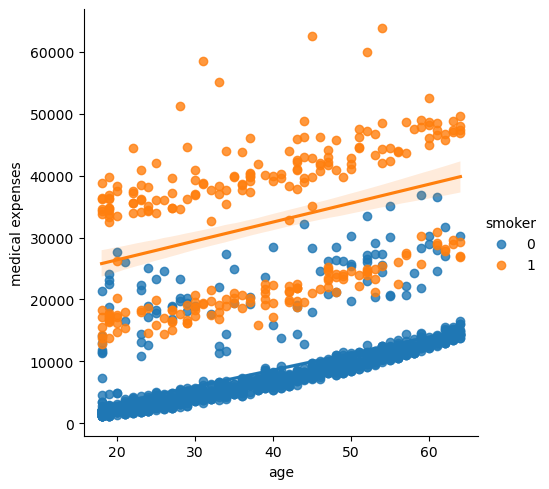

In [135]:
plt.figure(figsize=(15,7))
sns.lmplot(x = 'age' , y = 'charges' , data = data , hue = 'smoker')
plt.xlabel('age')
plt.ylabel('medical expenses')
plt.show()

now we can clearly understand the variation in charges with respect to age and smoking habits. the medical expense of a smoker is higher than that of non-smoker irrespective of age . in non-smokers the cost of treatment increases with age which is obvious

C:\Users\Anurag Sharma\AppData\Local\Temp\ipykernel_7676\1850917270.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[(data.bmi > 30)]['charges'])


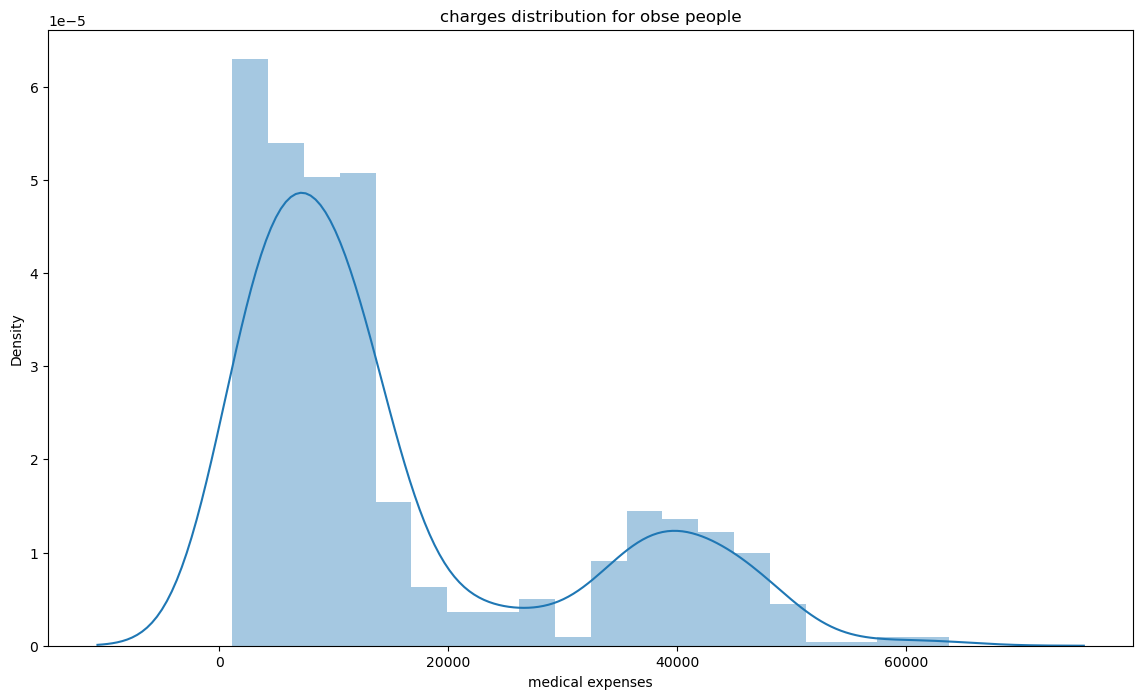

In [136]:
## relation between bmi and  medical expenses
plt.figure(figsize=(14,8))
sns.distplot(data[(data.bmi > 30)]['charges'])
plt.title('charges distribution for obse people')
plt.xlabel("medical expenses")
plt.show()

C:\Users\Anurag Sharma\AppData\Local\Temp\ipykernel_7676\4227198998.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[(data.bmi < 30)]['charges'])


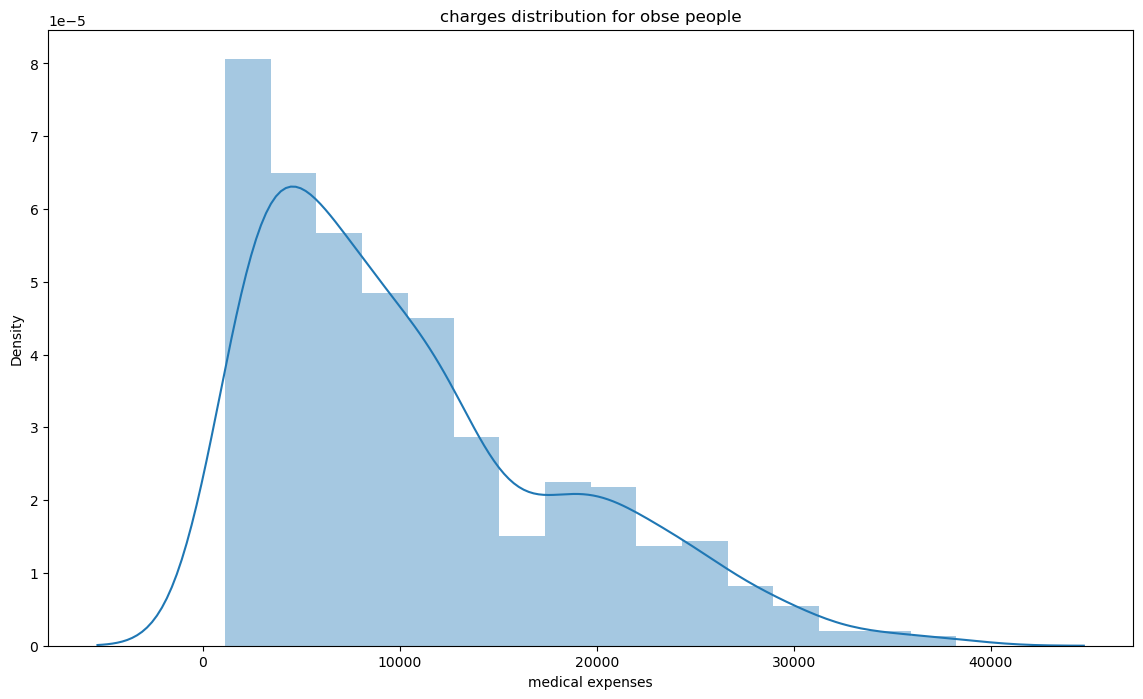

In [137]:
## relation between bmi and  medical expenses
plt.figure(figsize=(14,8))
sns.distplot(data[(data.bmi < 30)]['charges'])
plt.title('charges distribution for obse people')
plt.xlabel("medical expenses")
plt.show()

therefore people with BMI less than 30 are spending less whereas people with BMI more than 30 are spending more

## feature selection

In [138]:
#dropping irrelevant column
data.drop('region', axis = 1, inplace = True)

# model building & Evaluation

## linear regression

In [139]:
X = data.drop('charges' , axis = 1)
y = data.charges

In [140]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X , y ,test_size = 0.25, random_state = 2)

In [141]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1003, 5), (335, 5), (1003,), (335,))

In [142]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [143]:
y_pred = reg.predict(X_test)

In [144]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

print("R2 score:", metrics.r2_score(y_test,y_pred))

MAE: 4180.7864229732395
MSE: 37940112.46683448
RMSE: 6159.554567242219
R2 score: 0.7486163979240839


## Polynomial regression

In [145]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree= 2)
poly_reg

PolynomialFeatures()

In [146]:
##transforming the feature to higher degree
X_train_poly = poly_reg.fit_transform(X_train)

##splitting the data
X_train, X_test, y_train, y_test = train_test_split(X_train_poly, y_train, test_size = 0.2, random_state = 42)

In [147]:
##train the model
plr = LinearRegression()
plr.fit(X_train, y_train)

LinearRegression()

In [149]:
##making prediction
y_pred_plr = plr.predict(X_test)

In [150]:
#model evaluation
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred_plr))
print('MSE:', metrics.mean_squared_error(y_test, y_pred_plr))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_plr)))

print("R2 score:", metrics.r2_score(y_test,y_pred_plr))

MAE: 2968.0675866169813
MSE: 23550005.97341657
RMSE: 4852.834838876815
R2 score: 0.799893111119125


#### Result:My model is able to explain 80% of the total data set

## Making a Prediction System

In [157]:
#input the values
age = 21
sex = 1
bmi = 27
children = 0
smoker = 1

In [158]:
#predicting the price using random forest regression
charge = reg.predict([[age,sex,bmi,children,smoker]])
print('the charge of this new patient is $:',charge[0])

the charge of this new patient is $: 25746.780283790045


C:\anaconda\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
